In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set to prevent wrapping of wide tables
pd.set_option('display.expand_frame_repr', False)

# Set plot style
sns.set_theme(style="whitegrid")

In [ ]:
# Base path where dataset is stored
base_path = 'dataset'

def load_modis_file(year: int, country: str = 'India') -> pd.DataFrame:
    """
    Loads a MODIS fire dataset CSV for a given year and country.
    Adds a 'year' column to the DataFrame.
    """
    filename = f'modis_{year}_{country}.csv'
    filepath = os.path.join(base_path, filename)

    if not os.path.exists(filepath):
        raise FileNotFoundError(f"File {filename} not found in {base_path}")

    df = pd.read_csv(filepath)
    df['year'] = year

    return df


# Load datasets for multiple years into a list
years = [2021, 2022, 2023]
dfs = [load_modis_file(year) for year in years]

In [4]:
# Concatenate all dataframes into one
modis_df = pd.concat(dfs, ignore_index=True)
print(modis_df.head())

   latitude  longitude  brightness  scan  track    acq_date  acq_time satellite instrument  confidence  version  bright_t31   frp daynight  type  year
0   28.0993    96.9983       303.0   1.1    1.1  2021-01-01       409     Terra      MODIS          44     6.03       292.6   8.6        D     0  2021
1   30.0420    79.6492       301.8   1.4    1.2  2021-01-01       547     Terra      MODIS          37     6.03       287.4   9.0        D     0  2021
2   30.0879    78.8579       300.2   1.3    1.1  2021-01-01       547     Terra      MODIS           8     6.03       286.5   5.4        D     0  2021
3   30.0408    80.0501       302.0   1.5    1.2  2021-01-01       547     Terra      MODIS          46     6.03       287.7  10.7        D     0  2021
4   30.6565    78.9668       300.9   1.3    1.1  2021-01-01       547     Terra      MODIS          43     6.03       287.6   9.0        D     0  2021


In [5]:
# Basic exploration
print("Combined dataset shape:", modis_df.shape)

print("\nDataset Information:")
print(modis_df.info())

print("\nMissing values per column:")
print(modis_df.isnull().sum())

print("\nDuplicate rows count:", modis_df.duplicated().sum())

Combined dataset shape: (271217, 16)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271217 entries, 0 to 271216
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    271217 non-null  float64
 1   longitude   271217 non-null  float64
 2   brightness  271217 non-null  float64
 3   scan        271217 non-null  float64
 4   track       271217 non-null  float64
 5   acq_date    271217 non-null  object 
 6   acq_time    271217 non-null  int64  
 7   satellite   271217 non-null  object 
 8   instrument  271217 non-null  object 
 9   confidence  271217 non-null  int64  
 10  version     271217 non-null  float64
 11  bright_t31  271217 non-null  float64
 12  frp         271217 non-null  float64
 13  daynight    271217 non-null  object 
 14  type        271217 non-null  int64  
 15  year        271217 non-null  int64  
dtypes: float64(8), int64(4), object(4)
memory usage: 33.1+ MB
None

Missi

In [6]:
# Drop duplicates if needed
# modis_df = modis_df.drop_duplicates()

In [7]:
# Summary statistics for numeric columns
print("\nSummary statistics:")
print(modis_df.describe().T)


Summary statistics:
               count         mean         std        min        25%        50%        75%        max
latitude    271217.0    23.947505    4.919846     8.1362    20.9655    23.7888    27.7827    34.9734
longitude   271217.0    81.284024    6.559071    68.4526    75.8802    79.3209    84.7559    97.1044
brightness  271217.0   323.719192   14.147221   300.0000   314.5000   322.0000   330.7000   505.7000
scan        271217.0     1.421732    0.630742     1.0000     1.0000     1.2000     1.5000     4.8000
track       271217.0     1.152716    0.201943     1.0000     1.0000     1.1000     1.2000     2.0000
acq_time    271217.0   824.623755  353.966965   321.0000   648.0000   756.0000   825.0000  2202.0000
confidence  271217.0    64.065081   18.165329     0.0000    54.0000    66.0000    76.0000   100.0000
version     271217.0    21.933778   24.935515     6.0300     6.0300     6.0300    61.0300    61.0300
bright_t31  271217.0   303.499177    8.282440   267.2000   298.2000   

In [8]:
# Unique values in categorical columns (example: 'type')
print("\nFire type distribution:")
print(modis_df['type'].value_counts())


Fire type distribution:
type
0    257625
2     13550
3        42
Name: count, dtype: int64


In [9]:
for column in modis_df.select_dtypes(include='object').columns:
    num_unique = modis_df[column].nunique()
    print(f"\nColumn: {column} | Unique values: {num_unique}")
    print("Top values:" if num_unique > 10 else "Unique values:")
    print(modis_df[column].value_counts().head(10))


Column: acq_date | Unique values: 1088
Top values:
acq_date
2021-04-01    3108
2021-03-30    2873
2021-11-09    2432
2021-11-07    2280
2021-03-07    2102
2021-03-27    2058
2023-04-11    2035
2021-03-26    1987
2022-03-15    1970
2022-03-28    1874
Name: count, dtype: int64

Column: satellite | Unique values: 2
Unique values:
satellite
Aqua     185917
Terra     85300
Name: count, dtype: int64

Column: instrument | Unique values: 1
Unique values:
instrument
MODIS    271217
Name: count, dtype: int64

Column: daynight | Unique values: 2
Unique values:
daynight
D    240469
N     30748
Name: count, dtype: int64


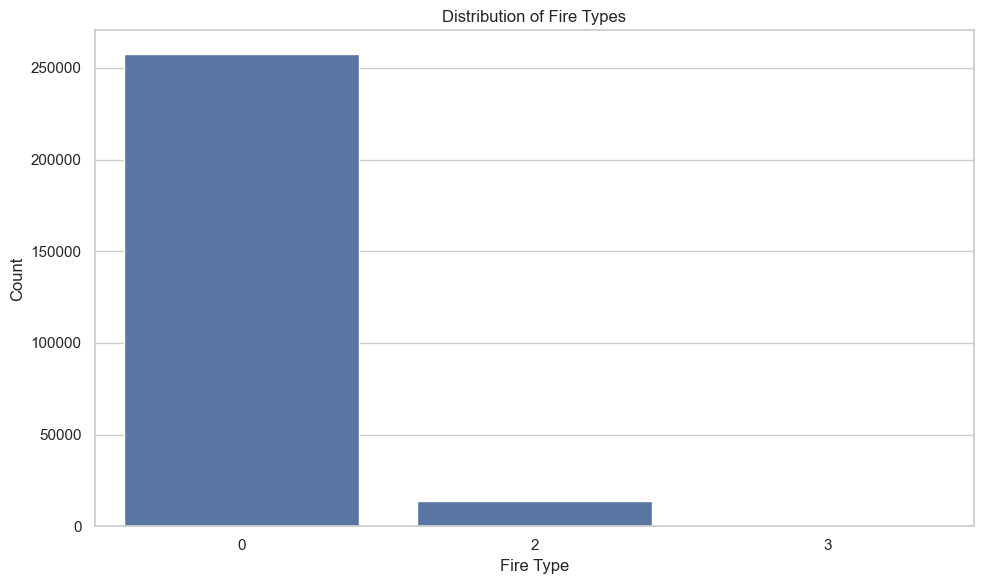

In [10]:
# Plot distribution of fire types
plt.figure(figsize=(10, 6))
sns.countplot(data=modis_df, x='type')
plt.title('Distribution of Fire Types')
plt.xlabel('Fire Type')
plt.ylabel('Count')
plt.tight_layout()

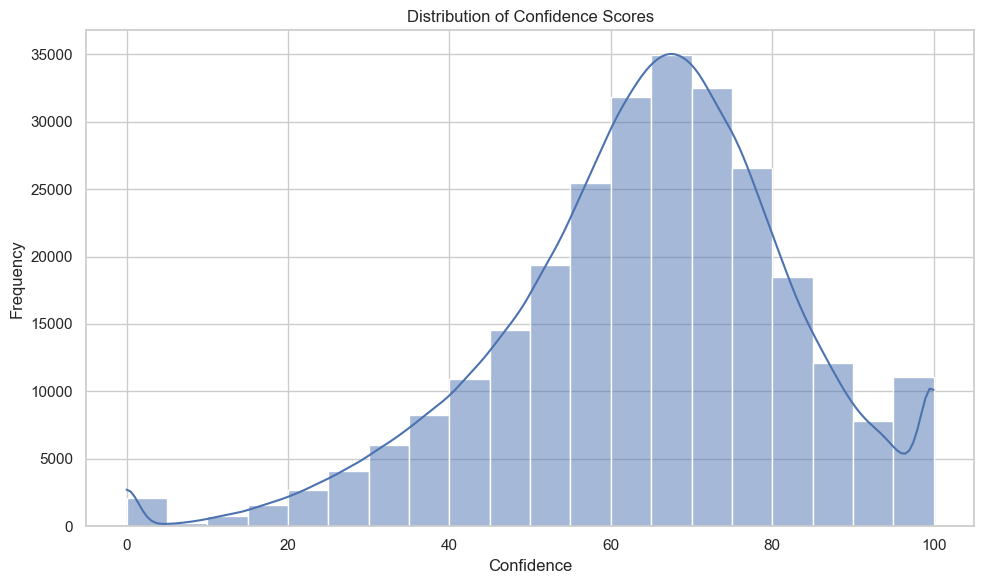

In [11]:
# Plot distribution of confidence scores
plt.figure(figsize=(10, 6))
sns.histplot(modis_df, x='confidence', bins=20, kde=True)
plt.title('Distribution of Confidence Scores')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.tight_layout()